<div style="color:#006666; padding:0px 10px; border-radius:5px; font-size:18px; text-align:center"><h1 style='margin:10px 5px'>Fitting Polynomials</h1>
<hr>
<p style="color:#006666; text-align:right;font-size:10px">
Copyright by MachineLearningPlus. All Rights Reserved.
</p>

</div>

When you have a series (data) you can fit a polynomial to:

1. Smoothen the data
2. Predict an approximated future value based on the fit
3. Fill up missing values in the data

Let's see how to do it in NumPy.

In [1]:
import numpy as np

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; font-size:16px'>1. Read data</h2>
</div>

In [2]:
arr = np.genfromtxt("Datasets/apple_stock_price.csv", delimiter=",", skip_header=1)
arr

array([[127.489998, 128.880005, 126.919998, 127.830002],
       [127.629997, 128.779999, 127.449997, 128.720001],
       [128.479996, 129.029999, 128.330002, 128.449997],
       ...,
       [133.470001, 135.089996, 133.25    , 135.020004],
       [135.520004, 136.270004, 134.619995, 135.509995],
       [135.669998, 135.899994, 134.839996, 135.350006]])

In [3]:
a = arr[:, 3]

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:7px 5px; font-size:16px'>Fitting a Cubic Polynomial</h2>
</div>

Fit and see coefs

In [4]:
t = np.arange(len(a))
poly = np.polyfit(t, a, 3)

# coefs
print("Polynomial fit \n", poly)

Polynomial fit 
 [ 1.33965657e-06 -5.92867081e-04 -4.03220304e-02  1.30369986e+02]


__Fitted values to smoothen the data__

In [5]:
cubic_fit = np.polyval(poly, t)
cubic_fit[:5]

array([130.36998584, 130.32907228, 130.28698103, 130.24372012,
       130.19929758])

__Predict next value__

In [6]:
print("Next value", np.polyval(poly, t[-1] + 1))

Next value 131.72987978116265


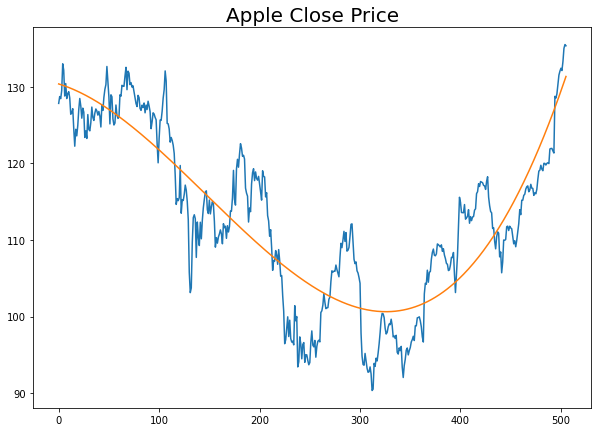

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.plot(a)
plt.plot(cubic_fit)
plt.title("Apple Close Price", size=20)
plt.show()

Roots of the polynomial

In [8]:
# roots of the polynomial
np.roots(poly)

array([ 404.2914357 +320.02549613j,  404.2914357 -320.02549613j,
       -366.03133091  +0.j        ])

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:7px 5px; font-size:16px'>Constructing Polynomials and Derivatives</h2>
</div>

In [11]:
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))

$$func = 1x^3 + 2x^2 + 3x^1 + 4$$

__1st Derivative__

In [12]:
func_der = func.deriv(m=1)
func_der

poly1d([3., 4., 3.])

__Y values based on function and derivative.__

In [13]:
x = np.linspace(-10, 10, 30)
y = func(x)
y1 = func_der(x)

__Plot__

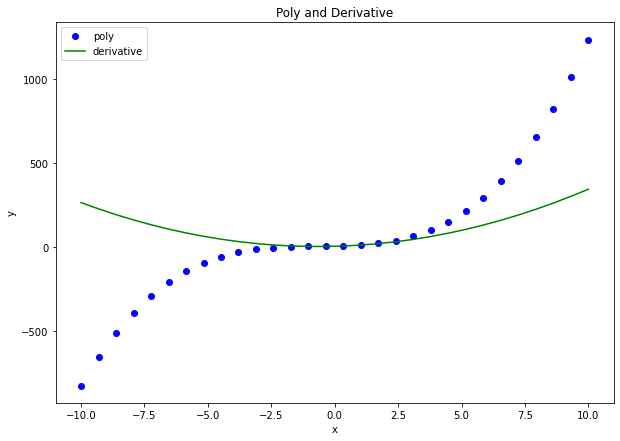

In [14]:
# Plot
plt.figure(figsize=(10,7))
plt.plot(x, y, 'bo', label="poly")
plt.plot(x, y1, 'g-', label="derivative")

plt.xlabel('x')
plt.ylabel('y')
plt.title("Poly and Derivative")
plt.legend()
plt.show()

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:7px 5px; font-size:16px'>Mini Challenge</h2>
</div>

Fill up the missing data in the following series data by fitting a 4th degree polynomial.

```python
import numpy as np
arr = np.genfromtxt("Datasets/stock_price_miss.csv", delimiter="csv", skip_header=1).round(2)
arr
```

Actual data is present in: `"Datasets/stock_price.csv"`

__Code URL__: https://git.io/JcJRh

__Solution__

In [15]:
import numpy as np
arr = np.genfromtxt("Datasets/stock_price_miss.csv", delimiter="csv", skip_header=1).round(2)
arr[:30]

array([127.83, 128.72, 128.45, 129.5 , 133.  ,    nan, 128.79, 130.42,
       128.46, 129.09, 129.36, 128.54, 126.41, 126.6 , 127.14, 124.51,
       122.24, 124.45, 123.59, 124.95,    nan, 128.47, 127.5 , 125.9 ,
       127.21, 126.69, 123.38, 124.24, 123.25, 126.37])

Create data with t and Y nearby

In [16]:
t = np.arange(len(arr))
data = np.c_[t, arr]
data[:10]

array([[  0.  , 127.83],
       [  1.  , 128.72],
       [  2.  , 128.45],
       [  3.  , 129.5 ],
       [  4.  , 133.  ],
       [  5.  ,    nan],
       [  6.  , 128.79],
       [  7.  , 130.42],
       [  8.  , 128.46],
       [  9.  , 129.09]])

__Series and missing data__

In [17]:
ser = data[~np.isnan(data[:, 1]), 1]
ind = data[~np.isnan(data[:, 1]), 0]
ind_missing = data[np.isnan(data[:, 1]), 0]

print(ser[:10])
print(ind[:10])
print(ind_missing)

[127.83 128.72 128.45 129.5  133.   128.79 130.42 128.46 129.09 129.36]
[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 10.]
[ 5. 20. 33. 47.]


Fit

In [18]:
poly = np.polyfit(ind, ser, 4)
print("Polynomial fit", poly)

Polynomial fit [-4.59159359e-09  5.98659968e-06 -2.10575276e-03  1.30313912e-01
  1.25996837e+02]


Predict

In [19]:
pred = np.polyval(poly, ind_missing)
pred

array([126.59650855, 127.80797264, 128.21372687, 128.06912462])

__Compare with actual__

In [20]:
act = np.genfromtxt("Datasets/stock_price.csv", delimiter="csv", skip_header=1).round(2)
act[ind_missing.astype('int')]

array([132.17, 127.04, 127.35, 130.28])